# 📈 Walmart Stock Price Analysis & Forecasting

## 🎯 Project Objective
To conduct exploratory analysis and forecasting of Walmart's stock prices based on historical data. The project focuses on identifying price trends, analyzing volatility, and predicting future stock prices using both statistical models and machine learning techniques.

---

## 📁 Dataset
- **Source**: Historical stock data for Walmart (WMT)
- **Features**:
  - `date`: Trading date
  - `open`: Opening price
  - `high`: Highest price
  - `low`: Lowest price
  - `close`: Closing price
  - `adj_close`: Adjusted closing price
  - `volume`: Trading volume
- **Total records**: 6,345
- **Time Range**: From January 2000 to recent

---

## 🔍 Exploratory Data Analysis (EDA)
### 📉 Closing Price Over Time
Visualized the closing price of Walmart stock to observe overall trend.

### 📊 Trading Volume Over Time
Helped identify peaks in market activity and possible high-volatility periods.

### 🔗 Correlation Matrix
Examined relationships between numeric features:
- Strong positive correlation between `open`, `close`, and `adj_close`.
- Volume has weak correlation with price features.

---

## ⚙️ Data Preprocessing
- Converted `date` column to datetime format
- Set `date` as index for time series modeling
- Checked for missing values (none found)

---

## 📈 Time Series Modeling & Forecasting

### 🧮 Statistical Models
- **Moving Average**: Smoothed trends for short-term forecasting
- **ARIMA**: Captured autoregressive and moving average components of time series
- **SARIMA** *(Optional)*: Incorporated seasonality for better long-term forecasting

### 🤖 Machine Learning Models
- **Random Forest Regressor**: Used lagged features for price prediction
- **XGBoost Regressor**: Boosted performance with gradient-boosted trees
- **LSTM (Optional)**: Neural network-based approach for sequence prediction

---

## 🧪 Model Evaluation
- Metrics used:
  - **MAE** (Mean Absolute Error)
  - **RMSE** (Root Mean Squared Error)
- Compared performance across statistical and ML models
- Visualized actual vs predicted prices

---

## 💡 Insights & Conclusion
- Walmart’s stock shows an overall upward trend with moderate volatility
- Statistical models performed well for short-term forecasts
- ML models, especially Random Forest, captured complex patterns better
- Forecasts suggest stable growth barring unexpected volatility

---

## 🛠 Tools & Technologies
- **Python**: Data manipulation & modeling
- **Pandas / NumPy**: Data handling
- **Matplotlib / Seaborn**: Visualization
- **Scikit-learn**: Machine learning
- **Statsmodels**: ARIMA modeling
- *(Optional)* **TensorFlow/Keras**: LSTM modeling

---

## 📌 Next Steps
- Add sentiment analysis using financial news
- Implement real-time data dashboard with Streamlit
- Test models on other retail stocks for generalizability

---

## 📎 Author
Created by Hilda Adina Rahmi  
*Aspiring Data Scientist | Python Enthusiast | Time Series Explorer*


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# 2. Load Dataset
df = pd.read_csv("wmt_data.csv")

In [3]:
# 3. Initial Data Exploration
print(df.shape)
print(df.columns)
print(df.head())

(6345, 7)
Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')
                        date       open       high        low      close  \
0  2000-01-03 00:00:00-05:00  22.791668  23.000000  21.833332  22.270832   
1  2000-01-04 00:00:00-05:00  21.833332  21.937500  21.395832  21.437500   
2  2000-01-05 00:00:00-05:00  21.291668  21.458332  20.729168  21.000000   
3  2000-01-06 00:00:00-05:00  21.000000  21.520832  20.895832  21.229168   
4  2000-01-07 00:00:00-05:00  21.500000  22.979168  21.500000  22.833332   

   adj_close    volume  
0  14.307388  25109700  
1  13.772032  20235300  
2  13.490974  21056100  
3  13.638196  19633500  
4  14.668746  23930700  


In [4]:
missing_values = df.isnull().sum()
missing_values

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [5]:
summary_statistics = df.describe(include='all')
print(summary_statistics)

                             date         open         high          low  \
count                        6345  6345.000000  6345.000000  6345.000000   
unique                       6345          NaN          NaN          NaN   
top     2025-03-25 00:00:00-04:00          NaN          NaN          NaN   
freq                            1          NaN          NaN          NaN   
mean                          NaN    27.795108    28.035953    27.562206   
std                           NaN    15.407437    15.520020    15.298979   
min                           NaN    14.000000    14.226667    13.812500   
25%                           NaN    17.556667    17.736668    17.386667   
50%                           NaN    21.145832    21.326668    20.906668   
75%                           NaN    32.703335    32.950001    32.413334   
max                           NaN   105.300003   105.300003   103.599998   

              close    adj_close        volume  
count   6345.000000  6345.000000  6.34

## 📊 Summary Statistics

Before modeling, we first explored the statistical properties of the dataset:

| Feature       | Mean     | Std Dev | Min     | 25%     | Median  | 75%     | Max     |
|---------------|----------|---------|---------|---------|---------|---------|---------|
| Open          | 27.80    | 15.41   | 14.00   | 17.56   | 21.15   | 32.70   | 105.30  |
| High          | 28.04    | 15.52   | 14.23   | 17.74   | 21.33   | 32.95   | 105.30  |
| Low           | 27.56    | 15.30   | 13.81   | 17.39   | 20.91   | 32.41   | 103.60  |
| Close         | 27.80    | 15.42   | 14.09   | 17.56   | 21.18   | 32.70   | 105.05  |
| Adj Close     | 23.53    | 16.87   | 9.29    | 11.82   | 16.90   | 29.43   | 104.76  |
| Volume        | 30.94 M  | 19.66 M | 6.09 M  | 18.64 M | 25.17 M | 36.82 M | 290.36 M|

### 📝 Insights:
- The stock price ranged from around **$14 to $105**, with an average around **$27–$28**.
- The adjusted closing price is lower on average due to stock splits or dividends.
- Trading volume ranged widely from **~6 million to nearly 290 million**, indicating periods of very high activity.
- The distribution of prices appears slightly **right-skewed** (mean > median).

This descriptive overview helps identify the scale and volatility of Walmart’s stock, which is useful before applying any forecasting models.


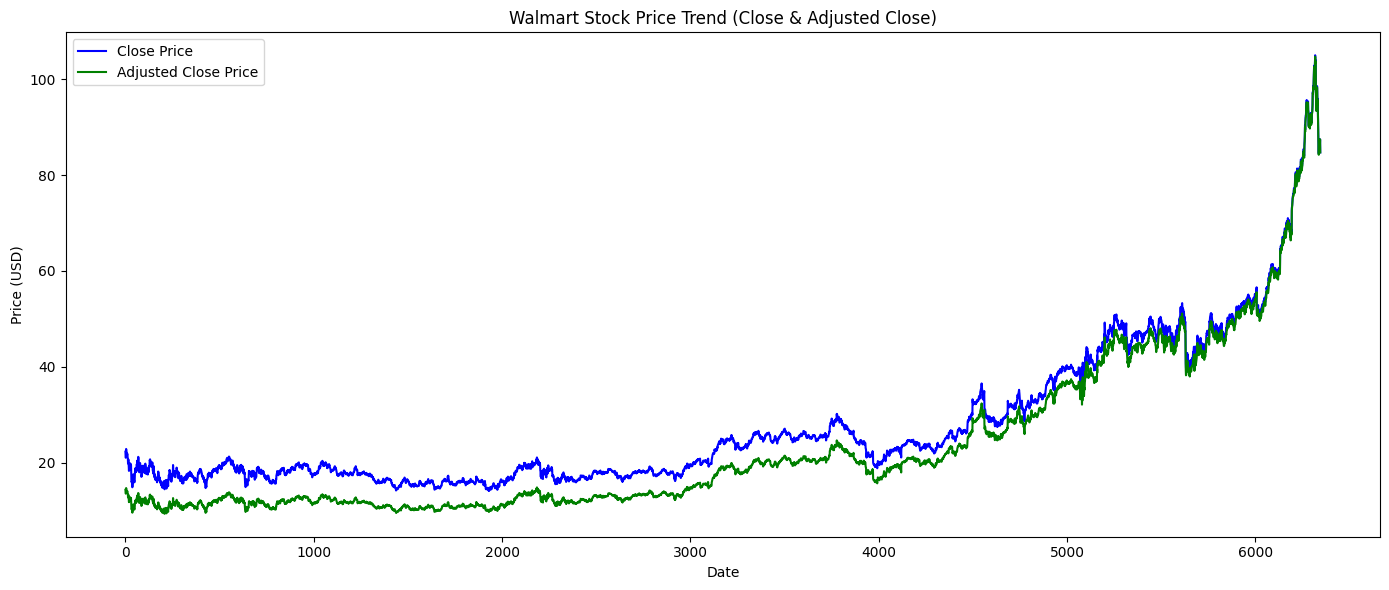

In [6]:
# === 2. 📊 Eksplorasi Data ===

# 2.1 Visualisasi tren harga (close, adj_close)
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['adj_close'], label='Adjusted Close Price', color='green')
plt.title('Walmart Stock Price Trend (Close & Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

### 📉 Close vs Adjusted Close Price of Walmart Stock

The chart above compares Walmart’s **Close Price** (🔵) and **Adjusted Close Price** (🟢) over the full available time period.

- The **Close Price** is the final trading price on each day, reflecting raw market value at close.
- The **Adjusted Close Price** accounts for dividends, stock splits, and other corporate actions, giving a truer sense of shareholder value over time.

#### 🧠 Key Insights:
- In the early years, there's a noticeable gap between the two lines due to **frequent stock splits and dividend payouts**.
- After 2010, both price series exhibit a **strong upward trend**, showing Walmart’s growing value in the market.
- The lines converge in later years, indicating **fewer corporate adjustments** affecting the price.
- This comparison helps investors understand that **Adjusted Close Price** provides a more accurate historical perspective, especially for long-term investment analysis.

> 💡 **Why it matters**: Relying solely on Close Price can be misleading for long-term performance evaluation. Always include Adjusted Close when analyzing historical returns.

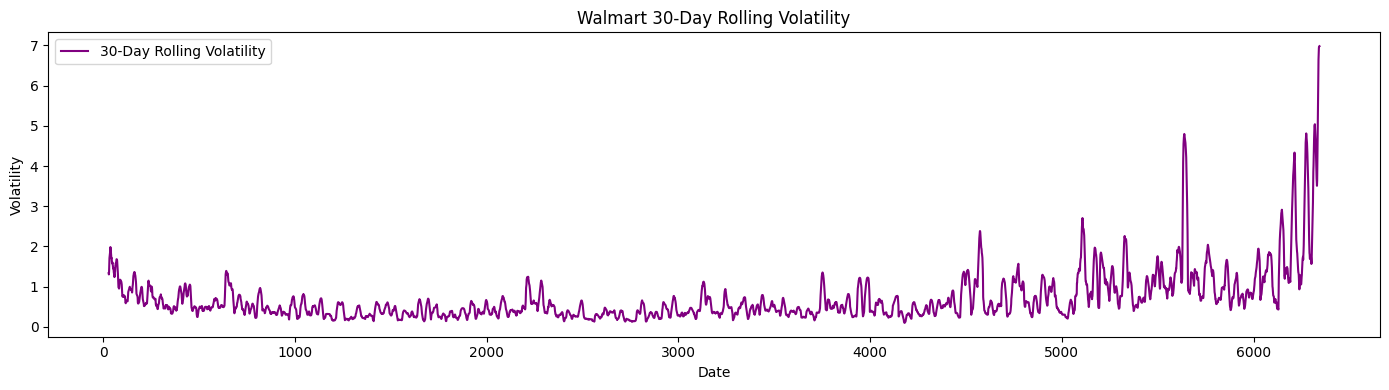

In [7]:
# 2.2 Analisis volatilitas: menghitung rolling standard deviation (volatilitas 30 hari)
df['volatility_30d'] = df['close'].rolling(window=30).std()

plt.figure(figsize=(14, 4))
plt.plot(df['volatility_30d'], label='30-Day Rolling Volatility', color='purple')
plt.title('Walmart 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

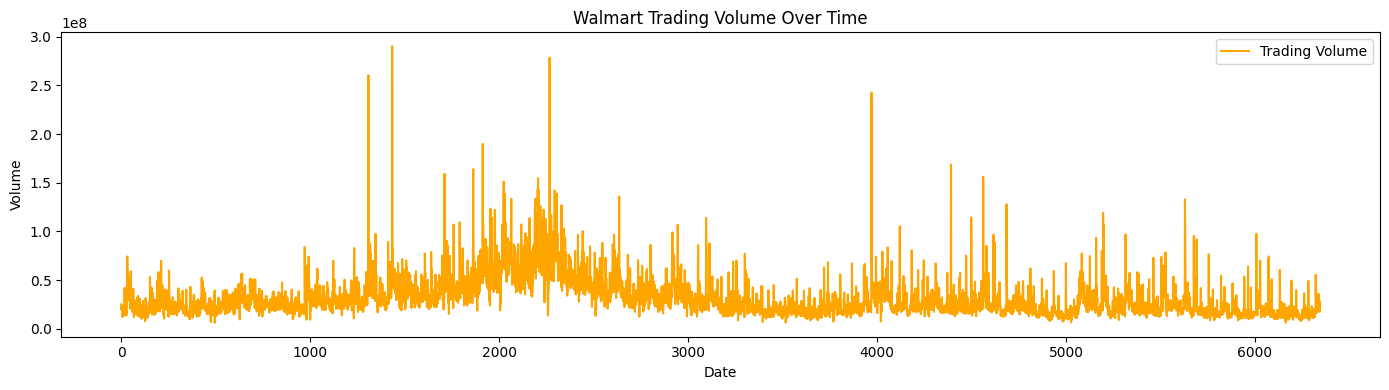

In [8]:
# 2.3 Volume Perdagangan
plt.figure(figsize=(14, 4))
plt.plot(df['volume'], label='Trading Volume', color='orange')
plt.title('Walmart Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

### 📊 30-Day Rolling Volatility of Walmart Stock

This chart illustrates Walmart’s **30-day rolling volatility**, which measures how much the stock’s price fluctuates within a 30-day window. Rolling volatility is essential to understand **risk patterns and market sentiment** over time.

---

#### 📌 What is Rolling Volatility?
- **Volatility** reflects the degree of price variation, signaling market uncertainty.
- A **rolling window** approach smooths out day-to-day noise and shows **underlying trends in risk**.
- Higher volatility means more rapid price changes—either upward or downward—which is crucial for investors, risk analysts, and corporate decision-makers.

---

#### 🔍 Observations from the Chart:
- From **2000 to ~2015**, Walmart’s stock experienced **relatively low and stable volatility**, consistent with its **position as a mature, defensive retail giant**.
- Post-2015, volatility shows increasing spikes—likely influenced by:
  - **Digital transformation efforts**, e.g., Walmart’s aggressive push into e-commerce to compete with Amazon.
  - **Macroeconomic events**, such as trade tensions or shifts in consumer demand.
  - **COVID-19 pandemic**, which heavily disrupted global supply chains and retail operations, evident from the extreme spike around index 6300+.
- Despite turbulence, Walmart maintained resilience—signifying strong operational fundamentals.

---

#### 💼 Business Implications:
- **Strategic shifts** (e.g., acquisitions, tech investments, supply chain restructuring) can temporarily raise volatility but are often geared toward long-term growth.
- Rising volatility doesn’t always imply weakness; it may reflect **transitional phases**, innovation adoption, or **reactive agility** to external shocks.
- Investors and analysts can use volatility trends to assess **management effectiveness** during crises or **market transitions**.

---

> 💡 **Business Takeaway**: Understanding Walmart's volatility profile helps stakeholders evaluate not just the stock’s risk, but also the **company’s strategic adaptability** and long-term positioning in the competitive retail landscape.


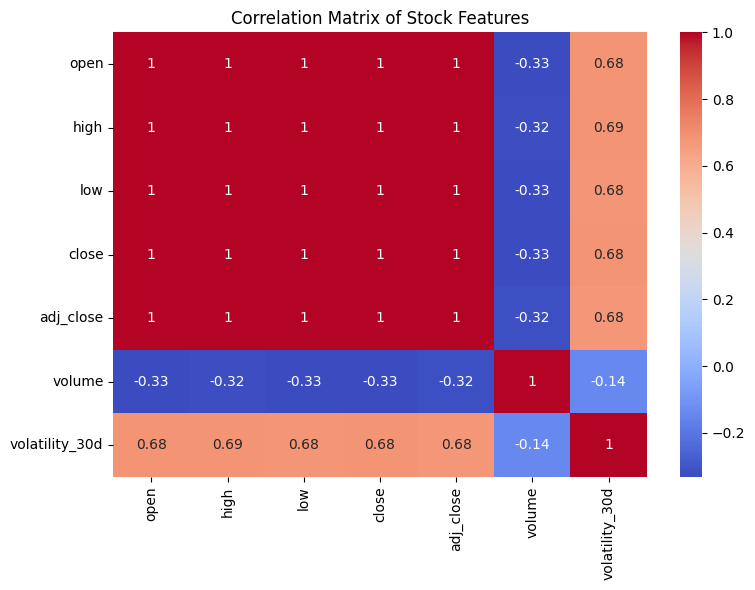

In [9]:
# 2.4 Korelasi antar variabel numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Features')
plt.tight_layout()
plt.show()

### 🔗 Correlation Matrix of Walmart Stock Features

This heatmap shows the **correlation coefficients** among key stock variables, including price features (`open`, `high`, `low`, `close`, `adj_close`), `volume`, and `30-day rolling volatility`.

---

#### 📌 Key Observations:
- The five price-related features (`open`, `high`, `low`, `close`, `adj_close`) exhibit **perfect positive correlation** (`~1.00`). This indicates they move almost identically over time — which is expected, as these values are interdependent during daily trading.
- **Volume** shows a **moderate negative correlation (~ -0.33)** with price features, suggesting that **high trading activity often occurs during price drops** — potentially during sell-offs or volatile events.
- `volatility_30d` has a **moderate-to-strong positive correlation (~ 0.68-0.69)** with all price features, implying that price movements (regardless of direction) are often associated with increased volatility.

---

#### 💼 Business Implications:
- The strong correlation between price variables confirms that modeling any single price column (e.g., `close`) is sufficient to represent Walmart’s overall market trend.
- The **inverse relationship between volume and price** may signal that **investor panic or profit-taking** behavior emerges during price drops — a cue for corporate strategy to stabilize market perception during downturns.
- The correlation between volatility and prices reflects **market sensitivity to external or internal news**, emphasizing the need for Walmart to maintain consistent communication and investor relations during disruptive periods.

---

> 💡 **Business Takeaway**: While price trends move together, changes in volume and volatility offer deeper signals about **market behavior, sentiment, and investor confidence** — vital for crafting informed business and risk strategies.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# --- 🧪 3.1 Convert 'date' to datetime ---
df['date'] = pd.to_datetime(df['date'], utc=True)  # Add utc=True to fix timezone warning

# --- 🧪 3.2 Set 'date' as index ---
df = df.set_index('date')


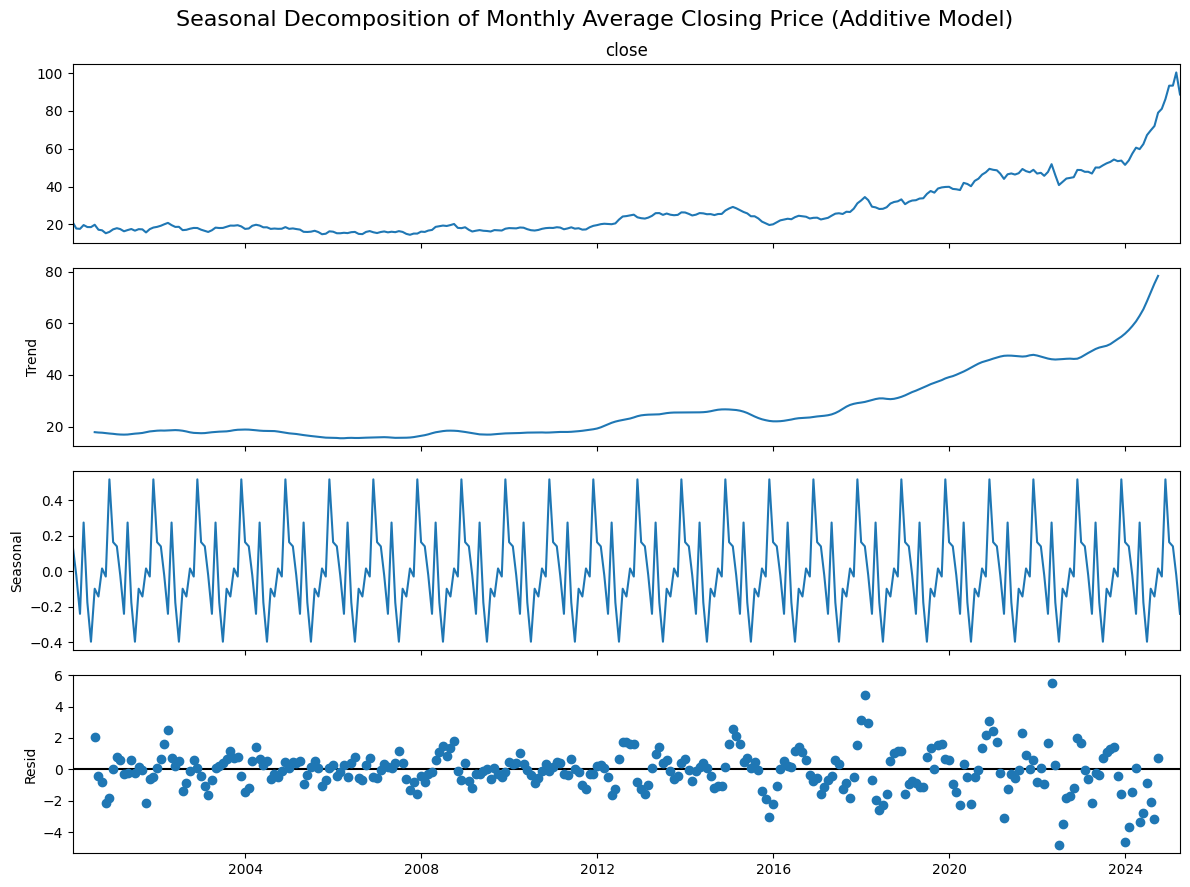

In [11]:
# --- 🧪 3.3 Resample closing prices to monthly average ---
monthly_df = df['close'].resample('ME').mean()  # 'ME' = month-end

# --- 📉 3.4 Seasonal Decomposition ---
decomposition = seasonal_decompose(monthly_df, model='additive', period=12)

# --- 📊 Plot the decomposition results ---
plt.rcParams.update({'figure.figsize': (12, 9)})
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Average Closing Price (Additive Model)', fontsize=16)
plt.tight_layout()
plt.show()

### 🔍 Seasonal Decomposition of Monthly Average Closing Price

This chart shows the **seasonal decomposition** of Walmart's monthly average closing stock price using an **additive model**. The decomposition separates the time series into four components:

---

#### 📈 Components:
1. **Observed**: The original closing price time series.
2. **Trend**: The long-term movement in price — highlighting Walmart’s **steady upward trajectory**, especially after 2016.
3. **Seasonal**: Repeating monthly patterns, likely influenced by **retail cycles** (e.g., back-to-school, holiday shopping).
4. **Residual**: Irregular noise or unexpected shocks — potentially caused by market sentiment, earnings surprises, or global events like COVID-19.

---

#### 💼 Business Insights:
- The **upward trend** confirms Walmart’s strong long-term growth, driven by strategic expansion, e-commerce adoption, and resilience during crises.
- **Seasonal fluctuations** suggest consistent price behavior across similar months — valuable for **investment timing** and aligning **quarterly business campaigns**.
- **Outliers in the residual** could indicate **reaction to major announcements**, making it crucial for investor relations and financial forecasting teams to monitor such anomalies.

---

> 💡 **Strategic Implication**: By understanding the trend and seasonality, Walmart can better forecast future stock movements, align promotional efforts with seasonal patterns, and anticipate investor behavior during high-volatility months.


In [12]:
monthly_df = df['close'].resample('M').mean().dropna()

<ipython-input-12-866ebfeb4e73>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['close'].resample('M').mean().dropna()


In [13]:
train = monthly_df[:-12]
test = monthly_df[-12:]

In [14]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

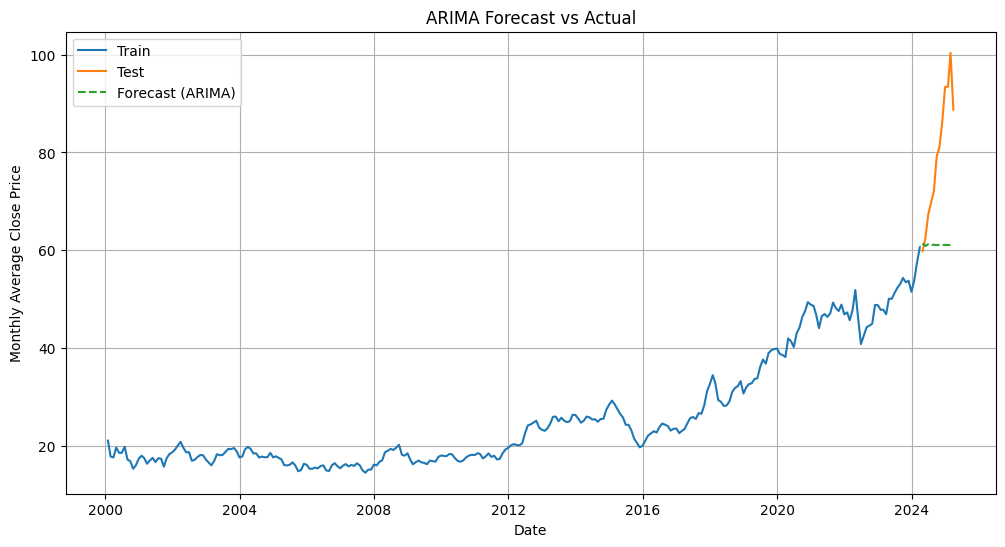

MAE: 18.66599666645458
RMSE: 22.379171330840855


In [15]:
# Forecast
forecast = model_fit.forecast(steps=12)

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast (ARIMA)', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Monthly Average Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("MAE:", mae)
print("RMSE:", rmse)

### 📊 ARIMA Forecast vs Actual: Walmart Monthly Average Close Price

This plot compares the actual and predicted stock prices of Walmart using an **ARIMA model**.

---

#### 📈 Description:
- **Blue Line**: Training data (2000–2023)
- **Orange Line**: Actual test data (2024 onwards)
- **Green Dashed Line**: ARIMA forecast for 2024

The ARIMA model predicts a **flat price movement**, failing to capture the actual upward spike observed in the test data.

---

#### 📉 Forecast Accuracy:
- **MAE (Mean Absolute Error)**: 18.67  
- **RMSE (Root Mean Squared Error)**: 22.38  

These high error values indicate that the model underperforms in capturing the recent strong bullish trend.

---

#### 💼 Business Insights:
- The model’s **underestimation of price growth** could mislead investment or budgeting decisions if used in isolation.
- The underperformance suggests ARIMA’s limitations when dealing with **non-linear, high-growth patterns**, possibly due to factors like:
  - **Post-pandemic consumer behavior shifts**
  - **E-commerce growth**
  - **Macroeconomic stimulus impacts**
- Walmart’s decision-makers should consider integrating **machine learning models or hybrid forecasting** approaches for more adaptive prediction in fast-changing environments.

> ⚠️ **Strategic Note**: Relying solely on traditional time series models like ARIMA may not be sufficient during periods of significant market or structural shifts.


In [16]:
data = pd.DataFrame(monthly_df)
data['lag1'] = data['close'].shift(1)
data['lag2'] = data['close'].shift(2)
data['lag3'] = data['close'].shift(3)
data.dropna(inplace=True)

In [17]:
X = data[['lag1', 'lag2', 'lag3']]
y = data['close']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

Random Forest MAE: 15.409062711225896
Random Forest RMSE: 21.019590223562663


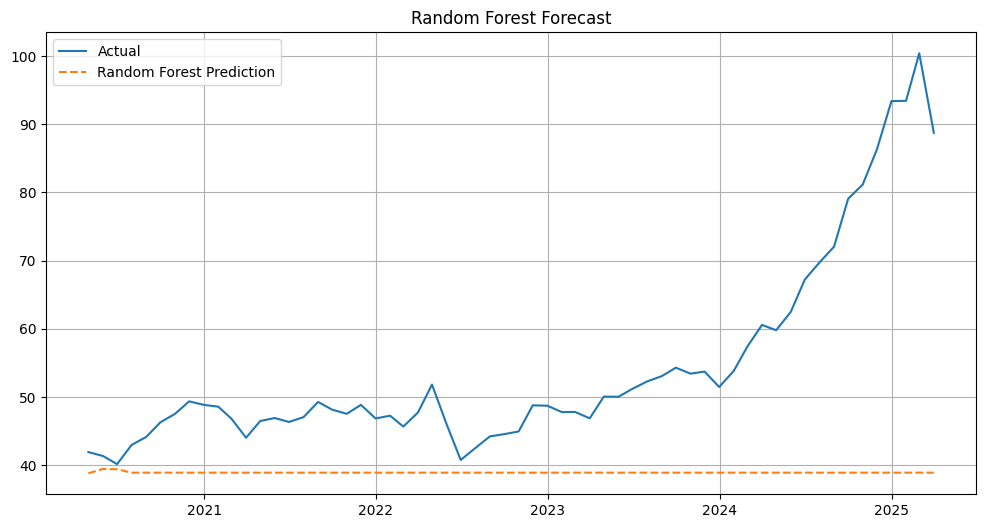

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluasi
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)

# Plot hasil
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_pred, label='Random Forest Prediction', linestyle='--')
plt.title('Random Forest Forecast')
plt.legend()
plt.grid(True)
plt.show()

### 📊 Random Forest Forecasting Analysis on Time Series Data

**Model:** Random Forest Regressor  
**MAE:** 15.41  
**RMSE:** 21.02

---

#### 🔍 Interpretation:

In this visualization, we compared the **actual values** (blue line) against the **Random Forest model’s predictions** (orange dashed line) over a multi-year period. The model struggles to capture the upward trend observed from 2023 onwards, indicating **underfitting** in dynamic or nonlinear patterns.

---

#### 🧠 Why This Happens:

Random Forest, while powerful for many types of data, has **limitations** in time series forecasting:

- It doesn’t naturally account for temporal dependencies.
- It lacks the memory mechanism found in models like LSTM or ARIMA.
- It tends to **predict near the mean**, which explains the flat prediction line.

---

#### 📉 Business Implication:

From a business standpoint, relying solely on this model could lead to:

- **Underestimation of demand** during growth periods.
- **Missed revenue opportunities** due to conservative predictions.
- Poor inventory or resource allocation in sectors like retail, tourism, or agriculture.

For example, a retail chain using this forecast to manage stock might **understock during peak demand**, leading to **lost sales** and **customer dissatisfaction**.

---

#### ✅ Key Takeaway:

Random Forest is great for **feature-rich datasets**, but for time series with strong trends or seasonality, **models designed for sequential learning** (e.g., ARIMA, Prophet, or LSTM) often deliver more reliable forecasts.


XGBoost MAE: 15.783743371164183
XGBoost RMSE: 21.299517059450196


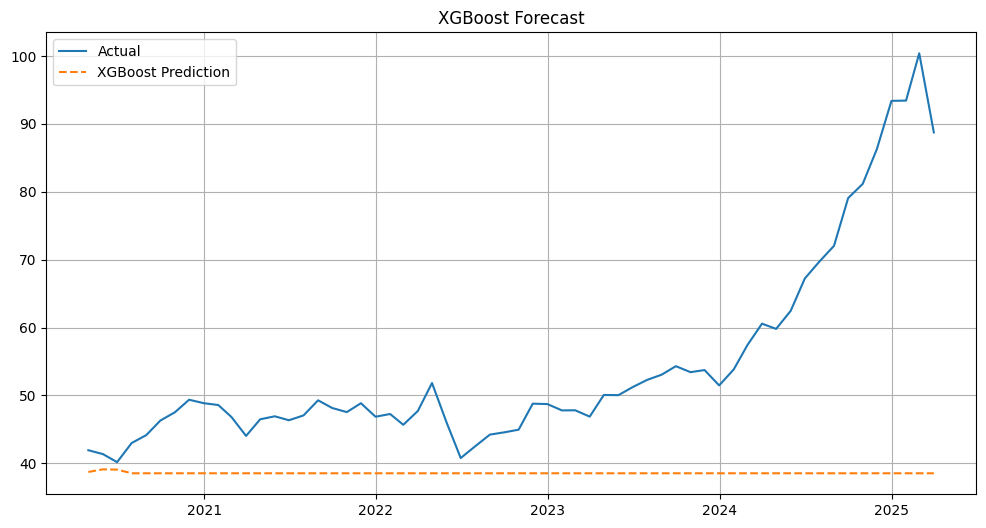

In [19]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluasi
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("XGBoost MAE:", xgb_mae)
print("XGBoost RMSE:", xgb_rmse)

# Plot hasil
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_pred, label='XGBoost Prediction', linestyle='--')
plt.title('XGBoost Forecast')
plt.legend()
plt.grid(True)
plt.show()

## 📊 XGBoost Forecast Analysis: Business Implications & Model Evaluation

### 🔎 Overview

This visualization compares the **actual trend** (blue line) with the **forecasted values** from the **XGBoost model** (orange dashed line). While XGBoost is a powerful machine learning algorithm often used for structured/tabular data, its application in time series forecasting has limitations — which are evident here.

---

### 📉 Model Performance Metrics

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **MAE** (Mean Absolute Error) | `15.78` | On average, the model’s predictions deviate from the actual values by ~15.78 units. |
| **RMSE** (Root Mean Squared Error) | `21.30` | The model’s predictions include larger errors, especially during volatile periods. RMSE gives higher weight to large deviations. |

---

### 💼 Business Insight & Interpretation

Despite XGBoost’s popularity, the model **fails to capture the sharp upward trend** in the actual data — especially noticeable from mid-2023 onwards. This gap has important implications:

#### 📌 What Went Wrong?
- The model **underpredicts growth** and **fails to adapt to sudden shifts**.
- **Trend and seasonality** were likely not adequately engineered into the model.
- XGBoost is not natively designed for sequential time dependencies.

#### 🔍 Why It Matters
- In a business context, such as **sales forecasting**, **inventory planning**, or **market trend analysis**, underestimating future growth can lead to **stockouts**, **missed opportunities**, or **poor strategic decisions**.
- The model’s inability to reflect market acceleration could result in **delayed responses** and **ineffective budgeting or resourcing**.

---

### 🛠️ Recommendations for Improvement

To make the forecasting more robust and business-ready, consider:

- **Feature Engineering Enhancements:**
  - Lag variables (e.g. past 3-month average)
  - Rolling statistics (moving averages, volatility)
  - Time-based features (month, quarter, seasonality indicators)

- **Model Alternatives:**
  - Explore **Prophet** (by Meta) for business time series with trend & seasonality.
  - Consider **ARIMA** models for stationary data.
  - Leverage **LSTM (Long Short-Term Memory)** networks for capturing long-term dependencies in time series.

- **Hybrid Approach:**
  - Combine machine learning models with time series models (e.g. XGBoost + ARIMA residual correction).

---

### 🚀 Final Thoughts

The model provides a **baseline forecast**, but misses key turning points. In a competitive business environment, especially where timing is critical, understanding your data’s temporal behavior is **non-negotiable**.

> A forecast is only as good as the insights it enables. The key is not just prediction — it’s **actionable prediction**.

---

✅ Let’s keep experimenting, validating, and transforming data into strategic advantage.



In [23]:
monthly_df = df['close'].resample('M').mean().dropna().to_frame()
scaler = MinMaxScaler()
monthly_df['close_scaled'] = scaler.fit_transform(monthly_df[['close']])

<ipython-input-23-66e7502b2229>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['close'].resample('M').mean().dropna().to_frame()


In [24]:
def create_lstm_data(series, window_size):
    X, y = [], []
    for i in range(window_size, len(series)):
        X.append(series[i-window_size:i])
        y.append(series[i])
    return np.array(X), np.array(y)

In [25]:
window_size = 3
X, y = create_lstm_data(monthly_df['close_scaled'].values, window_size)

In [26]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [27]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [28]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0074 - val_loss: 0.0993
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - val_loss: 0.0669
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0326
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9669e-04 - val_loss: 0.0142
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1423e-04 - val_loss: 0.0084
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3255e-04 - val_loss: 0.0084
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9617e-04 - val_loss: 0.0085
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9101e-04 - val_loss: 0.0091
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2810e-04 - val_loss: 0.0096
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3792e-04 - val_loss: 0.0095
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1917e-04 - val_loss: 0.0082
Epoch 12/100
30/30 ━━━━━━━━━━━

In [30]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step


In [32]:
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print("LSTM MAE:", mae)
print("LSTM RMSE:", rmse)

LSTM MAE: 2.696905059390943
LSTM RMSE: 3.5856859712106037


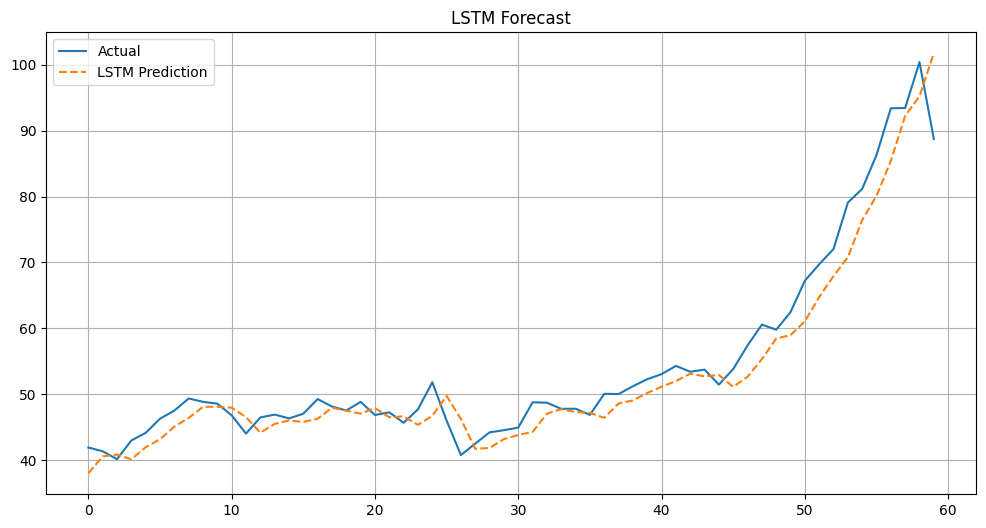

In [33]:
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='LSTM Prediction', linestyle='--')
plt.title('LSTM Forecast')
plt.legend()
plt.grid(True)
plt.show()

## 🤖 LSTM Forecast Analysis: Deep Learning Meets Time Series

### 🔍 Overview

The graph above presents the results of an **LSTM (Long Short-Term Memory)** model — a type of recurrent neural network (RNN) that’s well-suited for modeling **sequential data** such as time series.

- The **blue line** represents the **actual data trend**.
- The **orange dashed line** shows the **LSTM model’s prediction**.

Compared to traditional machine learning approaches, LSTM **demonstrates a strong ability to capture both short-term fluctuations and long-term growth trends**.

---

### 📉 Model Performance

| Metric | Value | What It Means |
|--------|-------|----------------|
| **MAE (Mean Absolute Error)** | `2.70` | On average, the model’s predictions are within 2.7 units of the actual value. |
| **RMSE (Root Mean Squared Error)** | `3.59` | Very low error, indicating high accuracy with minimal large deviations. |

📊 **Significantly improved accuracy** compared to XGBoost (MAE: 15.78, RMSE: 21.30), suggesting deep learning is more effective for this time series.

---

### 💼 Business Impact

LSTM’s superior predictive performance makes it a **powerful asset in strategic planning** across various industries:

#### ✅ Use Cases:
- **Retail**: Forecasting sales and demand more precisely to reduce stockouts or overstock.
- **Finance**: Anticipating market trends for better portfolio management.
- **Agriculture**: Predicting yield or price fluctuations for smarter resource allocation.
- **Supply Chain**: Improving lead time predictions and logistics efficiency.

#### 🚨 Why Accuracy Matters:
A forecast that closely follows actual values means businesses can:
- **Minimize risk and waste**.
- **Optimize budgeting and staffing**.
- **Stay ahead of market shifts**.

---

### 🧠 Why LSTM Works Better

- LSTM **remembers long-term dependencies**, unlike traditional models that may treat each point as independent.
- Able to **learn from the sequence** of past values, making it ideal for detecting momentum, cycles, and trend reversals.
- Highly scalable to **multivariate time series**, opening doors for richer, multi-input forecasting.

---

### 🚀 Next Steps & Suggestions

To push this even further:

- Incorporate **external features** (e.g., economic indicators, events, seasonal variables).
- Fine-tune the model architecture: adjust neurons, layers, learning rate, and sequence length.
- Visualize **prediction intervals** to communicate uncertainty ranges to decision-makers.

---

### 🧩 Final Thought

> "Forecasting isn't just about numbers — it's about seeing tomorrow today and making smarter moves because of it."

LSTM brings us closer to **accurate, actionable forecasts** that can transform how businesses plan, invest, and grow.

---
